# Deep Learning Basics

## Multilayer Perceptron/Feed Forward Architecture
### Implementing 3 Layer Neural Network From Scratch
![SegmentLocal](ImagesUsed/ClassificationNeuralNetwork.gif "segment")
#### Learning  Goals(Theory + Implementation)
- Understand the MultiLayer Perceptron(MLP)Architecture
- Understanding Forward Propogation & BackPropogation,Loss & Activation Functions
- Making Predictions
- Checking Classification Performance on different datasets
- Classification Project


# Part-1 Neural Architecture

### One Layer Network(Single Perceptron): as it have only one computaion neuron ie it do not have any hidden layers for computaion  or outputs .Also as we know it is not So powerful as it can only be used in case of linear classification.  
<img src='ImagesUsed/SingleLayerNeuralNetwork.jpg' width='500' height='500'>

- Simplest Unit Perceptron
- Only One Output Unit
- No Hidden Units
- Input is not counted in Layers


### Two Layer Network
<img src='ImagesUsed/2LayerNeuralNetwork.png' width='500' height='500'>

- Two Layers => 1 Hidden Layer + 1 Output Layer 
- Multi-Layer Perceptron or feed forward net or deep forward net

### Three Layer Network
<img src='ImagesUsed/3LayerNeuralNetwork.jpeg' width='500' height='500'>

- Three Layer => 2 Hidden Layers + 1 Output Layer
- Multi-Layer Perceptron/feed forward net/deep forward net

## Part-1:
- How to create a custom neural network

## Part-2:
- How to Pass one example?
- How to pass multiple examples(Vectorization)?
- Writting the code

## Part-3
# Backpropagation Algorithm!
- One of the most difficult/trickiest in ML to get right
- Why do we need this?

![SegmentLocal](ImagesUsed/GradientDescent.gif "segment")

- Quit Mathematical,challenging to understand
- Good Thing-As a deep learning engineer,you never have to implement backpropogation , as there are many libraries like tensorflow and pytorch, that are capable of implementing backpropagation automatically.

In [1]:
import numpy as np
#import matplotlib.pyplot as plt

In [2]:
# Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # setting the number of neurons in the 1st hidden layer to be 4 and the number of neurons in the 2nd hidden layer as 3
output_size = 2 # number of neurons in the output layer

In [3]:
 def softmax(a):
        e_pa = np.exp(a) # output is going to be vector if a is vector
        ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) # axis=1 represnts that we want the sum acroos the column, and keepdims=True means that we want to preserve our shape ie ifinitially we have a 2 -d matrix then we also want the result to be in a 2-d matrix only
        return ans

In [4]:
# Architecture
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        # we are creating a model dictionary so that we can acces all of our parameters later on
        model = {} # Dictionary
        #activation_outputs=()
        
        # First Layer(Hidden layer)
        model['W1'] = np.random.randn(input_size,layers[0]) # initializing a random weight matrix of size [n(l-1),n(l)],where n(l-1)=number of neurons in the previous layer and n(l) number of layers in the current layer for which we are creating the weight matrix
        model['b1'] = np.zeros((1,layers[0])) # creating a bias matrix having 1 row and number of units equal to the number of neurons in the layer that will store the biasses for each of the neuron in the layer 
        
        # Second Layer(Hidden Layer)
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third Layer(Hidden Layer)
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model=model
        self.activation_outputs = None
    def forward(self,x):
        #since the model parameters are packed inside the model dictionary,so we first need to
        #unpack the model paraameters them as follows:
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    
        # Implementing the equations
        # since sigmoid is not a inbuilt function of the numpy so instead we are using tanh
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1)
    
        z2 = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
    
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        
        # When passing over every layer of the network i am storing the respective activation or the outputs of each layer int the form of a tupple
        self.activation_outputs = (a1,a2,y_) # a1->output of 1st hidden layer , a2->output of 2nd hidden layer,y_->output of final layer 
        return y_    # returning the final output
        # this y_ will be of shape m X c , where m is the number of examples and c is the number of output classes available 
        
    def backward(self,x,y,learning_rate=0.001):# this method propagates your wrror and the gradient in backward direction
        # geting the model parameters:
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0] 
        a1,a2,y_ = self.activation_outputs
        
        #-->For Output Layer
        
        # start by computing the error at the final layer ie the output layer
        # y_= output given by the network
        delta3 = y_- y # y_ and y both will have the shape of m X c
        # Updating weights in the final layer
        dw3 = np.dot(a2.T,delta3)
        # change in biases
        db3 = np.sum(delta3,axis=0)#/float(m) # we are dividing by m,so that we can take the average
        
        #-->For Second Hidden Layer
        
        # for finding the update weights and biases we need the derivative of the activation ie delta 2
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T) # a2 is nothing by the activation
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)#/float(m)
        
        #-->For 1st hidden layer
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)#/float(m)
        
        # Update the model parameters using Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
         
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    # this function will define, that what our model is all about
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [5]:
# Loss function , it will be getting one hot vector for actual y's and also the probabilities for different classses as arguments for the function
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth): # we need this function because we want to feed our data to the network
    m=y.shape[0] # no. of rows
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1 # np.arange basically helps you to iterate over all the rows and y helps to reach the column of actual label and they 
    # together specify the index where the values are to be set to 1 which were 0 earlier due to initialization 
    return y_oht

### Generate Datasets

In [6]:
## Generate Dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [7]:
X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

In [8]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


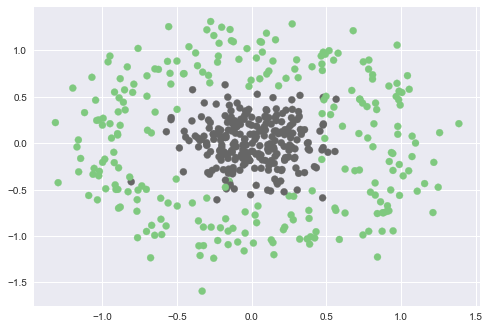

In [9]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training Our Model

In [10]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [11]:
#model.forward(X).shape
model.forward(X)
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [12]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    Y_OHT=one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
        
    return training_loss

In [13]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

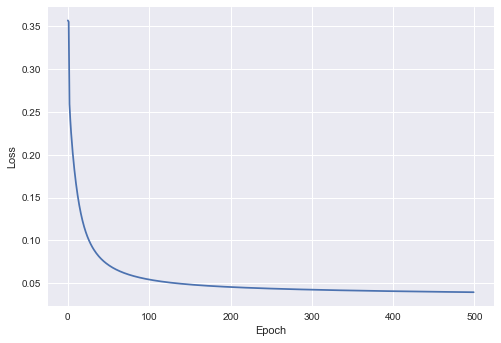

In [14]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [15]:
from visualize import plot_decision_boundary

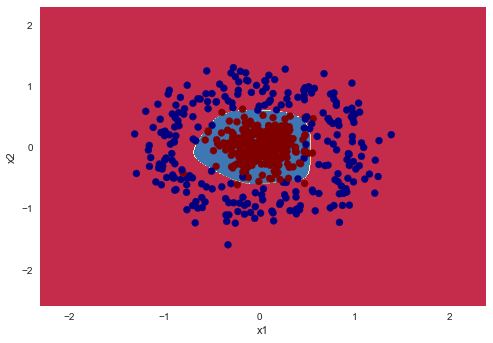

In [16]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [17]:
outputs = model.predict(X)

In [18]:
outputs == Y # using broadcasting every element of 1-d array is comapered with every element of Y 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [19]:
training_accuracy = np.sum(outputs==Y)/Y.shape
print("Training Accuracy %.4f" %(training_accuracy*100))

Training Accuracy 97.0000


- <i>It won't be possible to achieve such a great accuracy ie of 97% with any linear classifier for this dataset.Using any linear classifier for this dataset can give you only an accuracy of around 50% or 60%.</i>

## Testing performance on other non-linear datasets

In [20]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

## XOR dataset

In [21]:
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]
             ])
Y = np.array([0,1,1,0])

In [32]:
losses = train(X,Y,model,200,0.1)

Epoch 0 Loss 0.0789
Epoch 1 Loss 0.0716
Epoch 2 Loss 0.0653
Epoch 3 Loss 0.0598
Epoch 4 Loss 0.0551
Epoch 5 Loss 0.0510
Epoch 6 Loss 0.0474
Epoch 7 Loss 0.0442
Epoch 8 Loss 0.0414
Epoch 9 Loss 0.0389
Epoch 10 Loss 0.0367
Epoch 11 Loss 0.0347
Epoch 12 Loss 0.0328
Epoch 13 Loss 0.0312
Epoch 14 Loss 0.0297
Epoch 15 Loss 0.0283
Epoch 16 Loss 0.0270
Epoch 17 Loss 0.0259
Epoch 18 Loss 0.0248
Epoch 19 Loss 0.0238
Epoch 20 Loss 0.0229
Epoch 21 Loss 0.0221
Epoch 22 Loss 0.0213
Epoch 23 Loss 0.0205
Epoch 24 Loss 0.0198
Epoch 25 Loss 0.0192
Epoch 26 Loss 0.0186
Epoch 27 Loss 0.0180
Epoch 28 Loss 0.0174
Epoch 29 Loss 0.0169
Epoch 30 Loss 0.0165
Epoch 31 Loss 0.0160
Epoch 32 Loss 0.0156
Epoch 33 Loss 0.0151
Epoch 34 Loss 0.0148
Epoch 35 Loss 0.0144
Epoch 36 Loss 0.0140
Epoch 37 Loss 0.0137
Epoch 38 Loss 0.0134
Epoch 39 Loss 0.0131
Epoch 40 Loss 0.0128
Epoch 41 Loss 0.0125
Epoch 42 Loss 0.0122
Epoch 43 Loss 0.0119
Epoch 44 Loss 0.0117
Epoch 45 Loss 0.0115
Epoch 46 Loss 0.0112
Epoch 47 Loss 0.0110
Ep

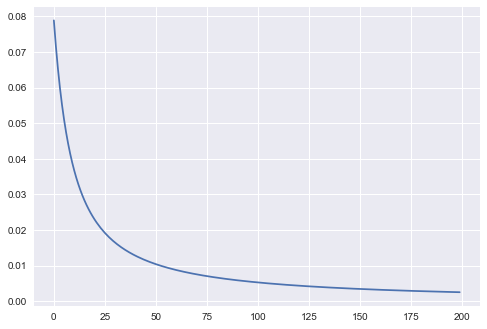

In [33]:
plt.plot(losses)

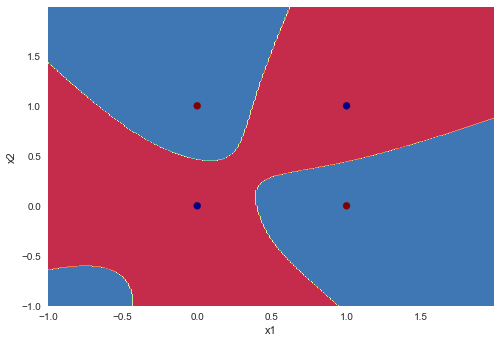

In [34]:
# Visuaalizing the decision Boundary for the predictions
plot_decision_boundary(lambda x:model.predict(x),X,Y)

- so we can observe that how efficiently our neural network is able to classify the 4 points in their respective classes.That's the beauty of neural network.

### Comparing Performance of our neural network on Different Datasets

In [36]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [38]:
def load_dataset(dataset):
    if(dataset) == 'moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) # we also used this dataset in Perceptron learning
    elif dataset == 'circles':
        X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset == 'classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=2)
    else:
        # Create XOR Dataset
        X = np.array([[0,0],
                      [0,1],
                      [1,0],
                      [1,1]])
        Y=np.array([0,1,1,0])
    return X,Y

Training Acc 100.0000


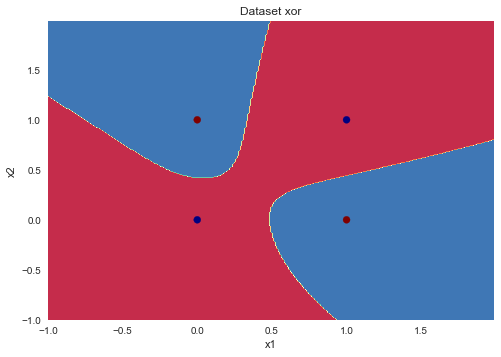

Training Acc 95.2000


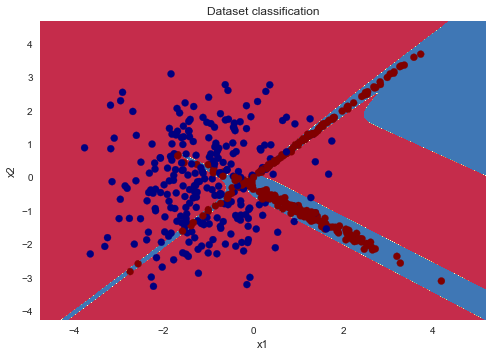

Training Acc 97.4000


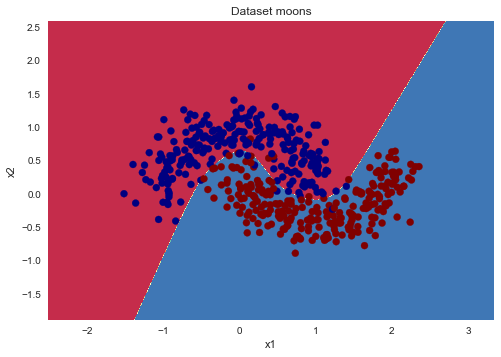

Training Acc 96.4000


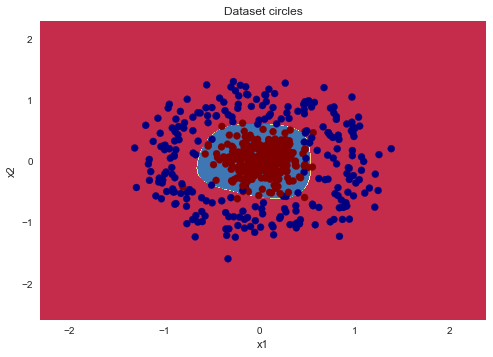

In [42]:
datasets = ["xor","classification","moons","circles"]
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2) # layers=[4,3] denotes that there are 4 neurons in 1st hidden layer and 3 neurons in 2nd hidden layer
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy=np.sum(outputs == Y)/Y.shape[0]
    print("Training Acc %.4f" %(training_accuracy*100))
    
    # code for plotting the graphs
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()

In [24]:
#W2 = np.random.randn(layers[0],layers[1])
#print(W2) # 4X3 matrix

#n1=NeuralNetwork(input_size,layers,output_size)
#print(n1.model)

In [25]:
#y_oht = one_hot(Y,2) # where k reffers to the number of classes
#print(y_oht)

In [26]:
#Id we have a numpy array as a then the np.exp(a) ,implements broadcasting on the whole numpy array,ie return a numpy arrray  onlyo of the scalar values 
#a = np.array([[5,1,2],[6,1,2]])
#np.exp(a)
#np.sum(a,axis=1,keepdims=True)

# testing softmax function on random numpy arrays:
#a = np.array([[10,10], # probabilities are same for both values as both the values are same ie 10 and 10
             #[20,30]]) # probabilities will be very high for 30 and very low for value 20
#a_=softmax(a)
#print(a_)
  